In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('analise.csv', delimiter=';')
df.head()

,Ano de Notificacao,Vacinas,Numero de Casos,Coeficiente de Incidencia,Numero de Obitos,Coeficiente de Mortalidade
0,2013,93453,3,"0,03",0,0
1,2014,288873,5,"0,04",0,0
2,2015,272406,2,"0,02",0,0
3,2016,126278,0,0,0,0
4,2017,45560,0,0,0,0


In [52]:
x = df['Vacinas'].to_numpy()
x_filtro = x[:-3]
y = df['Numero de Casos'].to_numpy()
y_filtro = y[:-3]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_filtro, y_filtro, test_size=0.2, random_state=0)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x_train.reshape(-1, 1))
poly.fit(x_train.reshape(-1, 1), y_train)

PolynomialFeatures(degree=4)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(poly.fit_transform(x_test.reshape(-1, 1)))

array([ 14029, 272406])

[array(0), array(1), array(64), array(729), array(4096), array(15625), array(46656), array(117649), array(262144), array(531441)]
[array([348.90300452]), array([348.90300438]), array([348.90243884]), array([348.83004368]), array([346.66851177]), array([319.70510125]), array([160.56821463]), array([-67.55215979]), array([491.33152456]), array([-65725.00058133])]


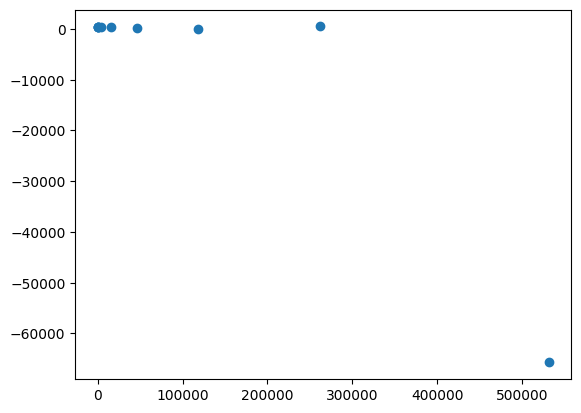

In [57]:
import numpy as np

test_x = []
test_y = []
for i in range(10):
  x_simu = i**6
  x_simu = np.asarray(x_simu)  
  test_x.append(x_simu)
  previsao = model.predict(poly.fit_transform(x_simu.reshape(-1, 1)))
  test_y.append(previsao)

print(test_x)
print(test_y)
plt.scatter(test_x, test_y)

In [59]:
y_test

array([9370,    2])

In [60]:
y_pred

array([325.00322783, 359.19547904])

In [61]:
print('Acuracia: ', metrics.accuracy_score(y_test, y_pred.astype(int)))

Acuracia:  0.0
